In [35]:
%%capture
%pip install pycairo cairocffi python-igraph
from SteamUser import *
import json
import igraph as ig

users = {}; basic2user = {}; user2basic = {}

with open("users22k.json", "r") as file:
    for i, l in enumerate(file.readlines()):
        u = SteamUser.fromdict(json.loads(l))
        if not u.friends == None:
            u.steamID = str(u.steamID)
            users[u.steamID] = u
            basic2user[len(basic2user)] = u.steamID
            user2basic[u.steamID] = len(user2basic)
        
    file.close()

In [36]:
G = ig.Graph([[user2basic[u], user2basic[f]] for u in users for f in users[u].friends if f in users.keys()])

print("Created graph with {} nodes and {} edges".format(G.vcount(), G.ecount()))

Created graph with 16304 nodes and 220663 edges


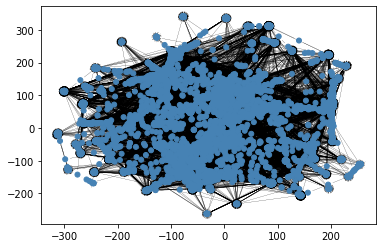

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
layout = G.layout_auto()
ig.plot(G, layout=layout, target=ax, edge_width=0.1)